In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [88]:
company = pd.read_csv("C:\\Data science\\Data sets\\Decision Tree\\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [89]:
company["dummy"] = pd.factorize(company.ShelveLoc)[0]
company["dummy1"] = pd.factorize(company.Urban)[0]
company["dummy2"] = pd.factorize(company.US)[0]
Drp = company.drop(["ShelveLoc","Urban","US"],axis = 1)
comp = Drp.rename(columns = {"dummy":"ShelveLoc","dummy1":"Urban","dummy2":"US"})
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138,73,11,276,120,42,17,0,0,0
1,11.22,111,48,16,260,83,65,10,1,0,0
2,10.06,113,35,10,269,80,59,12,2,0,0
3,7.40,117,100,4,466,97,55,14,2,0,0
4,4.15,141,64,3,340,128,38,13,0,0,1


In [90]:
comp["Sales"] = comp.Sales.astype("category")
print(comp.dtypes)

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
Age               int64
Education         int64
ShelveLoc         int64
Urban             int64
US                int64
dtype: object


In [106]:
from sklearn import preprocessing
sal= comp.Sales
le = preprocessing.LabelEncoder()
target = le.fit_transform(sal)
#target = comp.Sales
inputs = comp.drop(["Sales"],axis = "columns")
#inputs
target

array([255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
        61, 227, 234, 328, 190, 252, 126,  88, 321, 117, 210, 286, 177,
        47, 239, 191, 165, 302,  46,   9, 208, 218, 304, 130, 188,  82,
        58,  49, 228, 204,  93, 253, 162, 318,  60,  35, 117,  79,  70,
        52,  90,   1, 210,  24, 232, 233, 132, 135, 110, 242, 209,  71,
       226, 169, 156, 141, 303, 142, 196, 229, 245, 298, 127,  64,  48,
       205, 126, 257, 172,  28, 125,  74, 127, 274, 316, 111, 128, 161,
         3, 237, 223,  31, 282, 168, 300, 280, 289, 174, 105, 143, 178,
       163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137, 137, 153,
       300, 191, 318, 235, 120,   0, 167,  94, 279, 287, 182,  6

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size = 0.2)


In [108]:
y_train[:5]

array([148, 239,  39,  94, 327], dtype=int64)

In [109]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion = "entropy")

In [110]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [111]:
y_test[:10]

array([173,  63,  30, 163, 214, 154,  44, 320,  64, 111], dtype=int64)

In [112]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

6      4
165    3
126    2
320    2
168    2
      ..
329    1
71     1
69     1
196    1
128    1
Length: 66, dtype: int64

In [113]:
y_test

array([173,  63,  30, 163, 214, 154,  44, 320,  64, 111, 109,  42, 314,
        84, 166,  47, 318, 103,  71, 159,  56,  93, 115,  27, 117, 296,
        66, 274, 122, 270, 146,  53, 197, 128, 286,  76, 106,   0,  17,
       278, 291, 124,  62, 117,  51,  57, 110, 227,  55, 310, 256, 272,
        34, 311,  49,  98, 208, 158, 293,  58, 116,  46,  73,  40,  50,
       193, 231, 178, 292, 322,  63, 281, 307, 183,  84, 128, 279, 271,
       185,  35], dtype=int64)

In [114]:
pd.crosstab(y_test,pred)

col_0,5,6,8,9,10,13,21,23,37,52,...,303,316,319,320,329,330,331,332,333,335
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
fraud = pd.read_csv("C:\\Data science\\Data sets\\Decision Tree\\Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [47]:
fraud["Target"] = ["Risky" if x <= 30000  else "Good" for x in fraud['Taxable.Income']] 
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [58]:
fraud["dummy_Target"] = pd.factorize(fraud.Target)[0]
fraud["dummy_Mar"] = pd.factorize(fraud['Marital.Status'])[0]
fraud["dummy_Un"] = pd.factorize(fraud['Undergrad'])[0]
fraud["dummy_ur"] = pd.factorize(fraud['Urban'])[0]
drp = fraud.drop(["Marital.Status","Undergrad","Urban"],axis = "columns")
FRD = drp.rename(columns = {"dummy_Mar":"Marital.Status","dummy_Un":"Undergrad","dummy_ur":"Urban"})
FRD.head()

,Taxable.Income,City.Population,Work.Experience,Target,dummy_Target,Marital.Status,Undergrad,Urban
0,68833,50047,10,Good,0,0,0,0
1,33700,134075,18,Good,0,1,1,0
2,36925,160205,30,Good,0,2,0,0
3,50190,193264,15,Good,0,0,1,0
4,81002,27533,28,Good,0,2,0,1


In [73]:
target1 = FRD.Target
inputs1 = FRD.drop(["Target","dummy_Target"],axis = "columns")

In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(inputs1,target1,test_size = 0.2)

In [75]:
#len(X_train)
len(X_test)

120

In [76]:
model1 = tree.DecisionTreeClassifier(criterion = "entropy")
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [77]:
Y_test[:10]

80      Good
471    Risky
19     Risky
170     Good
89     Risky
254     Good
258     Good
391     Good
405     Good
483    Risky
Name: Target, dtype: object

In [85]:
model1.predict(X_test[:10]) # prediction values 

array(['Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky'], dtype=object)

In [81]:
preds = model1.predict(X_test)
pd.Series(preds).value_counts()

Good     92
Risky    28
dtype: int64

In [86]:
pd.crosstab(Y_test,preds)

col_0,Good,Risky
Target,,
Good,92,0
Risky,0,28


[Text(167.4, 163.07999999999998, 'X[0] <= 30055.5\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 384\nvalue = [384, 0]')]

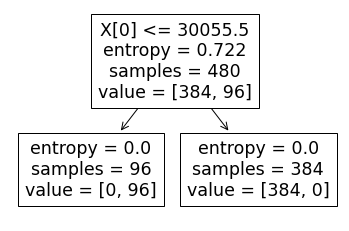

In [105]:
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
tree.plot_tree(model1)